In [1]:

import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa.display
%matplotlib inline

In [2]:

def plot_waves(file_name): 
    j=1
    for i in file_name:
        y, sr = librosa.load(i)
        plt.figure()
        plt.subplot(3, 1, j)
        librosa.display.waveplot(y, sr=sr)
        plt.title('Monophonic')
        j=j+1
def plot_specgram(file_name):
    j=1
    for i in file_name:
        y, sr = librosa.load(i)
        plt.figure()
        plt.subplot(3, 1, j)
        specgram(y, Fs=sr)
        plt.title('Monophonic')
        j=j+1
def plot_log_specgram(file_name):
    j=1
    for i in file_name:
        y, sr = librosa.load(i)
        plt.figure()
        plt.subplot(3, 1, j)
        D = librosa.logamplitude(np.abs(librosa.stft(y))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title('Monophonic')
        j=j+1

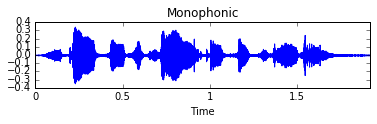

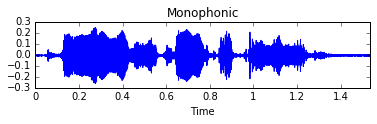

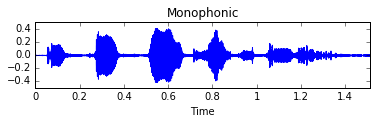

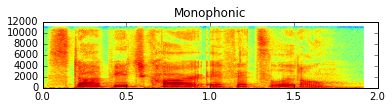

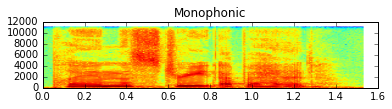

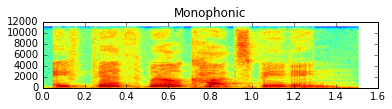

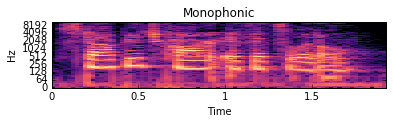

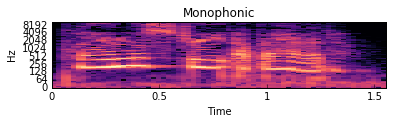

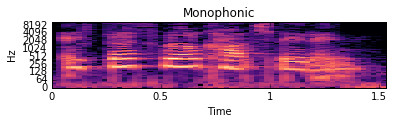

In [3]:
sound_file_paths = ["frf02_s02_solo.wav","frf02_s03_solo.wav","frf02_s04_solo.wav"]
plot_waves(sound_file_paths)

plot_specgram(sound_file_paths)
plot_log_specgram(sound_file_paths)

In [28]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,sub_dirs2,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for dname in sub_dirs:
        for label, sub_dir in enumerate(sub_dirs2):
            #print(label,sub_dir)
            for fn in glob.glob(os.path.join(parent_dir, dname, sub_dir, file_ext)):
                try:
                    mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
                    #print(mfccs)
                except Exception as e:
                    print("Error encountered while parsing file: ", fn)
                    continue
                ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
                features = np.vstack([features,ext_features])
                print(fn)
                labels = np.append(labels, fn.split('\\')[3].split('_')[0])
                print(labels)
    return np.array(features), np.array(labels,dtype=np.int)



In [9]:
parent_dir = 'New Dataset'
sub_dirs1=["fast","retell","rsi","solo","sync","whsp"]
sub_dirs2 = ["frf01","frf02","frf03","frf04","frm01","frm02","frm03","frm04","irf01","irf02","irf03","irf04","irf05","irf06","irf07","irf08","irf09","irf10","irf11","irf12","irm01","irm02","irm03","irm04","irm05","irm06","irm07","irm08","irm09","irm10","irm11","irm12","irm13","irm14","irm15","irm16"]
features, labels = parse_audio_files(parent_dir,sub_dirs1,sub_dirs2)
print(labels)
#print(features,labels)

New Dataset\fast\frf01\1_f01_fast.wav
['1']
New Dataset\fast\frf01\1_f02_fast.wav
['1' '1']
New Dataset\fast\frf01\1_f03_fast.wav
['1' '1' '1']
New Dataset\fast\frf01\1_f04_fast.wav
['1' '1' '1' '1']
New Dataset\fast\frf01\1_s01_fast.wav
['1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s02_fast.wav
['1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s03_fast.wav
['1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s04_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s05_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s06_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s07_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s08_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s09_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf01\1_s10_fast.wav
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
New Dataset\fast\frf

In [12]:
print(labels.shape)

(6048,)


In [13]:
print(features.shape)

(6048, 193)


In [15]:
import pickle
f = open('Features.pickle', 'wb')
pickle.dump(features, f, pickle.HIGHEST_PROTOCOL)
f.close()

In [16]:
import pickle
f = open('Lables.pickle', 'wb')
pickle.dump(labels, f, pickle.HIGHEST_PROTOCOL)
f.close()

In [35]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels+1,n_unique_labels+1))
    print(one_hot_encode.shape)
    one_hot_encode[np.arange(1,n_labels+1), labels] = 1
    return one_hot_encode

In [36]:
print(len(labels))
labels = one_hot_encode(labels)

6048
(6049, 37)


In [57]:
print(labels[37:40])
print(features.shape)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]]
(6048, 193)


In [58]:
train_test_split = np.random.rand(len(features)) < 0.70


In [64]:
print(train_test_split.shape)

(6048,)


In [59]:
train_x = features[train_test_split]
train_y = labels[train_test_split]


C:\Users\Abhi\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6049 but corresponding boolean dimension is 6048
  from ipykernel import kernelapp as app


In [67]:
print(train_x.shape)
print(train_y.shape)

(4240, 193)
(4240, 37)


In [68]:
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

C:\Users\Abhi\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6049 but corresponding boolean dimension is 6048
  from ipykernel import kernelapp as app


In [69]:
print(test_x.shape)
print(test_y.shape)

(1808, 193)
(1808, 37)


# Train Neural Network

In [70]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [88]:
training_epochs = 10000
n_dim = features.shape[1]
print(n_dim)
n_classes = 37
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

193


In [89]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [90]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [91]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

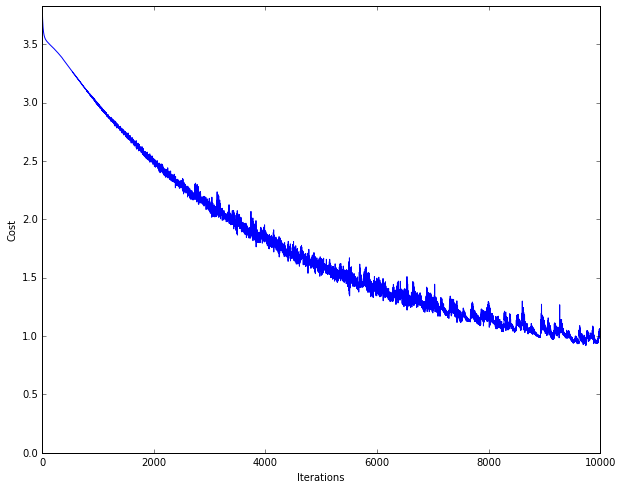

F-Score: 0.717


In [92]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))